<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** Alexia Marisol Díaz Verduzco & Frida María Hernández López

**Fecha:** 14 de octubre del 2021.

**Expediente** : if720500 & if720476
    
**Profesor:** Oscar David Jaramillo Zuluaga.
    
**Link Github**: https://github.com/FridaHernandezL/ProyectoConjunto_Modulo2

# Proyecto TEMA-2

### 1.1 Simulación aplicada a clientes con tarjeta de crédito.

### 1.2 Objetivos.
> #### 1.2.1 Objetivo general.
>  - Presentar a la institución bancaria información valiosa y rentable para la toma de decisiones.


> #### 1.2.2 Objetivos específicos.
>  - Evaluar y simular el límite de crédito promedio para los clientes.  
>  - Determinar por medio de simulaciones el rango de edad al que conviene ofrecer futuras tarjetas de crédito.
>  - Proyectar el número de transacciones medio en un año dentro de la institución bancaria. 
>  - Analizar la conducta de los clientes en base al tiempo activo dentro de la institución. 

### 1.3 Definición del problema.

> Una tarjeta de crédito es un documento de material plástico o metal emitido por un banco o institución especializada a nombre de una persona, que podrá utilizarla para efectuar compras sin tener que pagar en efectivo y pudiendo, además, llevar el pago de los productos a períodos futuros, el usuario debe asumir la obligación de devolver el importe dispuesto y de pagar los intereses, comisiones bancarias y gastos.

> En muchos países sobretodo subdesarrollados el uso de tarjetas de crédito es un tema poco conocido así como también es común la desconfianza a las mismas. Sin embargo, por el rumbo profesional que ambas llevamos consideramos este tema como algo muy importante e interesante.  

> Entre los fénomenos financieros que se presentaron durante la pandemia como sociedad, predomina un deceso importante en las líneas de crédito; con este análisis queremos brindar a la institución en cuestión una visión más organizada sobre algunos de los aspectos de los clientes, para así ayudar a la toma de decisiones dentro de la financiera brindando una perspectiva más amplia, que optimicen las ventas e ingresos en el banco.

### 1.4 Nodos y variables que se decidieron simular y porqué

> Los nodos que decidimos simular son:


>  -  Límite de crédito 
>  -  Edad del cliente 
>  -  Numero de transacciones al año
>  -  Tiempo activo

Conocer el **límite de crédito** promedio nos ayudará a visualizar como opera la institución financiera de forma interna, es decir, que cantidades promedio está autorizada a otorgar.  

El objetivo de proyectar el **número de transacciones al año** promedio de un banco ayudará a comprender el estado de la institución y el flujo de dinero que tenga la misma, así como ayudará a conocer más certeramente la liquidez con la que cuenta anualmente.

La finalidad de conocer el rango de **edad** más frecuente, nos ayuda a visualizar posibles clientes de la institución que aun no cuentan con tarjeta de crédito y son candidatos a obtener una.  

Al analizar el **tiempo activo** de los clientes nos brindará información del comportamiento de los mismos, en otras palabras identificaremos en un futuro cuantos clientes activos tendrá la institución para que el banco tome decisiones respecto a su administración(valuación del riesgo). 

### Diagrama de flujo 

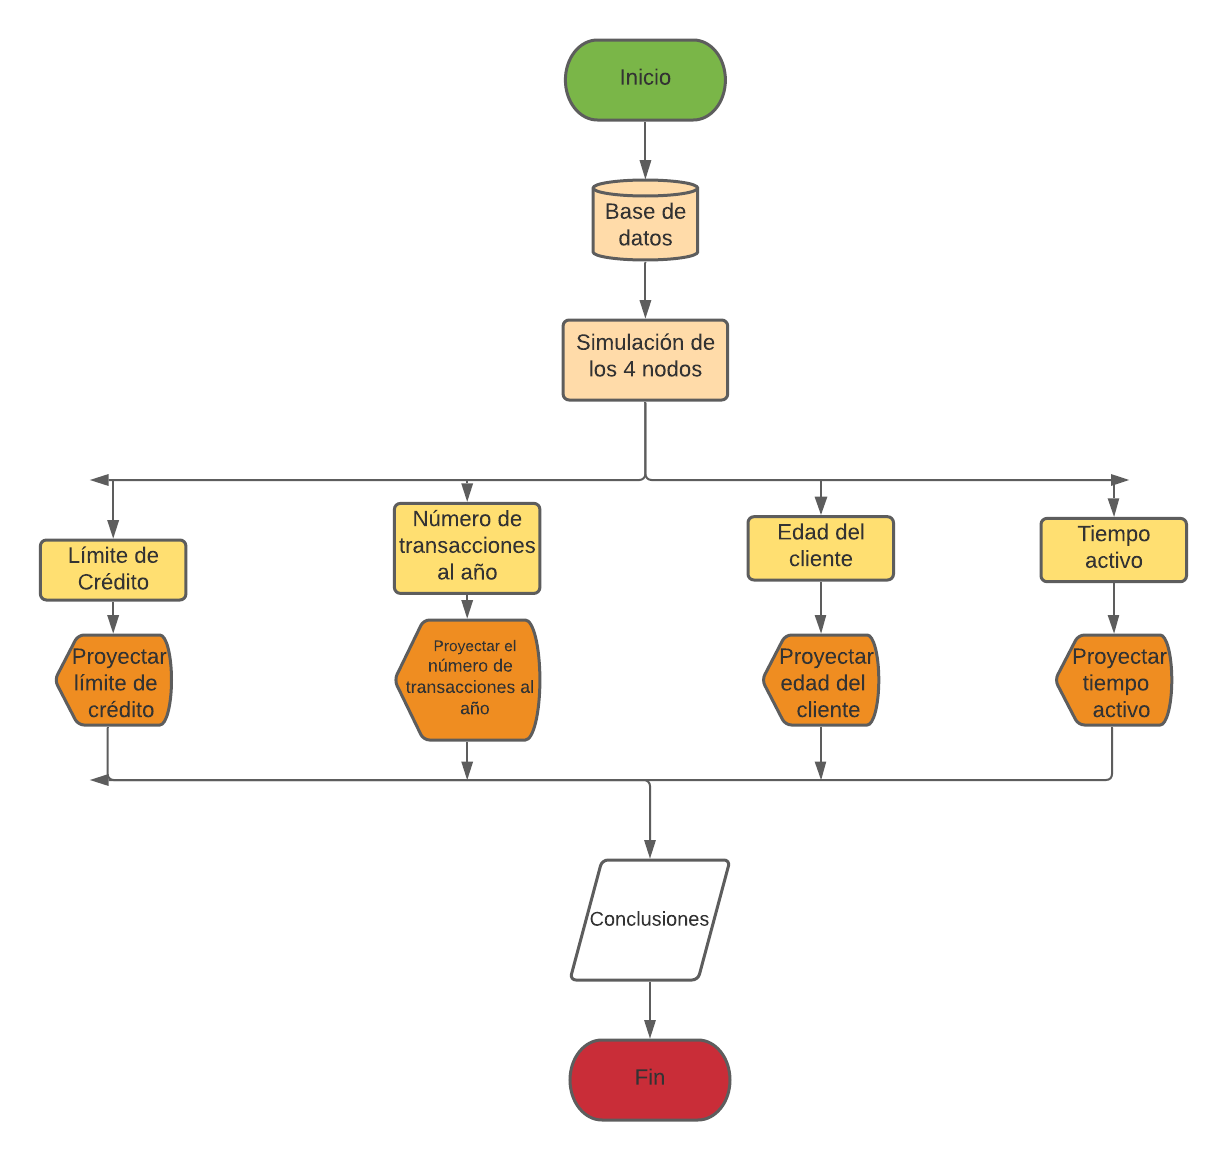

In [1]:
from IPython.display import Image
Image("Diagrama_Proyecto.PNG")

### 1.5 Definición de hipótesis y supuestos

> Supuestos Constantes 
>   -  El dólar estadounidense es la moneda base para el límite de crédito. 
>   -  La institución bancaria solamente cuenta con 4 tipos de tarjeta.
>   -  Los meses con tenencia de la cuenta bancaria serán tomados como 30 días.
>   -  Toda la información presentada es real. 
>   -  Las 4 variales a utilizar son las más relevantes para presentar a la institución.

> Hipótesis
>   -  Un 60% de los clientes cuentan con un límite de crédito igual o inferior al promedio.
>   -  La categoría de la tarjeta más común es la "Blue"
>   -  El rango de edad más común de los clientes se centra en personas en la etapa de la vida laborable o productiva.
>   -  Los clientes no perduran con su tarjeta de crédito más de 3 años. 

### 1.6 Obtención de la base de datos

### Librerías 

In [2]:
import numpy as np
from sklearn.neighbors import KernelDensity
from scipy.stats import gaussian_kde
from statsmodels.nonparametric.kde import KDEUnivariate
from statsmodels.nonparametric.kernel_density import KDEMultivariate
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import optimize
import scipy.stats as st     
import statsmodels.api as sm 
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

### Base de datos normal 

aquí se explica de donde se obtuvo la base de datos
https://www.kaggle.com/sakshigoyal7/credit-card-customers

In [3]:
data= pd.read_csv("BankChurners.csv")
data= data.set_index('ID_cliente')
data.head()

,Cuenta,Edad,Genero,Dependientes,Nivel_educativo,Estado_civil,Ingresos,Categoria_tarjeta,Meses_cuenta,Recuento_relaciones_total,...,Limite_credito,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
ID_cliente,,,,,,,,,,,,,,,,,,,,,
768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


### Base de datos a utilizar (limpia)

In [4]:
data = data[['Limite_credito','Total_Trans_Ct','Edad','Meses_cuenta']]
data.head()

,Limite_credito,Total_Trans_Ct,Edad,Meses_cuenta
ID_cliente,,,,
768805383,12691.0,42,45,39
818770008,8256.0,33,49,44
713982108,3418.0,20,51,36
769911858,3313.0,20,40,34
709106358,4716.0,28,40,21


### 1.7 Simulación nodos

#### Funciones a utilizar en los 4 nodos

In [5]:
# Dependiendo del ajuste de parámetro, se define bandwidth
# Nodo 1
def kde_scipy_1(x,bandwidth=13.96, **kwargs):
    """Kernel Density Estimation with Scipy"""
    kde = gaussian_kde(x, bw_method=bandwidth / x.std(ddof=1), **kwargs)
    return lambda x_grid: kde.evaluate(x_grid)

# Nodo 2
def kde_scipy_2(x,bandwidth=1.3, **kwargs):
    """Kernel Density Estimation with Scipy"""
    kde = gaussian_kde(x, bw_method=bandwidth / x.std(ddof=1), **kwargs)
    return lambda x_grid: kde.evaluate(x_grid)
# Nodo 3
def kde_scipy_3(x,bandwidth=4.41, **kwargs):
    """Kernel Density Estimation with Scipy"""
    kde = gaussian_kde(x, bw_method=bandwidth / x.std(ddof=1), **kwargs)
    return lambda x_grid: kde.evaluate(x_grid)
# Nodo 4
def kde_scipy_1(x,bandwidth=1, **kwargs):
    """Kernel Density Estimation with Scipy"""
    kde = gaussian_kde(x, bw_method=bandwidth / x.std(ddof=1), **kwargs)
    return lambda x_grid: kde.evaluate(x_grid)

In [6]:
def acep_rechazo(f:'función objetivo a generar',
                 max_f:'maximo de la funcion',
                 N: 'numero de variables aleatorias distribuidas a generar',
                 b: 'Entero máximo del vector x',
                 n: 'Salto del vector en R2'):
    X = np.zeros(N)
    i = 0 
    while i < N:
        R2 = np.random.uniform(0,max_f) 
        R1 = np.random.uniform(0,b,n)

        if R2 < f(R1):
            X[i] = R1
            i+=1
    return X

In [7]:
def muestreo_est(B: 'Número de estratos'):
    u= np.random.uniform(B) 
    i=np.arange(0,B) 
    v = (u+i)/B 
    return v 


def Gen_distr_discreta_(p_acum: 'P.Acumulada de la distribución a generar',
                       indices: 'valores reales a generar aleatoriamente',
                       N: 'cantidad de números aleatorios a generar'):
    
    U =np.random.rand(N)
    # Diccionario de valores aleatorios
    rand2reales = {i: idx for i, idx in enumerate(indices)}

    # Series de los valores aletorios
    y = pd.Series([sum([1 for p in p_acum if p < ui]) for ui in U]).map(rand2reales)

    return y

def plot_histogram_discrete(distribucion:'señal de varibles aleatorias de un distribución DISCRETA dada',
                            label:'label del legend a aparecer en el gráfica',
                            densidad:'por defecto regresa el histograma en densidad'=True):
    # len(set(distribucion)) cuenta la cantidad de elementos distintos de la variable 'distribucion'
    plt.figure(figsize=[10,4])
    y, x = np.histogram(distribucion, bins=len(set(distribucion)), density=densidad) 
    plt.bar(x[1:], y, label=label)
    plt.legend()
    plt.show()

### NODO 1. Límite de crédito  

El primero nodo se caracteriza por el uso de la variable **límite de crédito**, el cual se define como la cantidad máxima que un cliente de la entidad financiera puede disponer al poseer una tarjeta de crédito.  

Debido a que el objetivo de un banco es colocar dinero, captado anteriormente del público, a tasas más elevadas; con este nodo se busca simular el promedio de límite de crédito que ayudará a estimar que cantidad de activos tendrá disponible una vez que el cliente salde su deuda, sumada a sus respectivos intereses. 

(array([5211., 1524.,  931.,  589.,  407.,  299.,  252.,  161.,  128.,
         625.]),
 array([ 1438.3 ,  4746.07,  8053.84, 11361.61, 14669.38, 17977.15,
        21284.92, 24592.69, 27900.46, 31208.23, 34516.  ]),
 <a list of 10 Patch objects>)

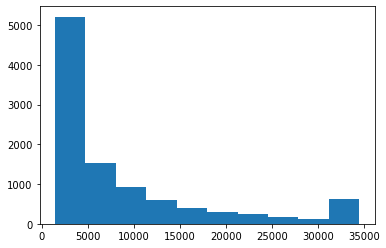

In [8]:
limite =  data['Limite_credito']
plt.hist(limite)

In [9]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(KernelDensity(),
                    {'bandwidth': np.linspace(10,15,30)},
                    cv=20) 
grid.fit(np.array(limite)[:, None])
print(grid.best_params_)

{'bandwidth': 13.96551724137931}


In [10]:
# Debido al ajuste de parámetros, nos indica un bandwidth = 13.96
limites = kde_scipy_1(data['Limite_credito'])
limites

<function __main__.kde_scipy_1.<locals>.<lambda>(x_grid)>

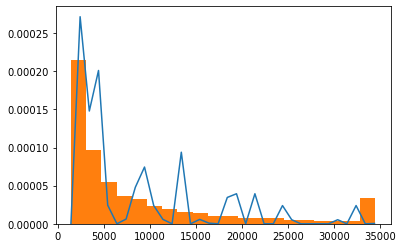

In [11]:
# Histograma con estimación por KDE
x_limite = np.arange(1430,34600,1000)
plt.figure()
plt.plot(x_limite,limites(x_limite))
plt.hist(limite,bins = 20, density = True)
plt.show()

Una vez comprobado visualmente que la estimación KDE es buena, procedemos con la aplicación del Método Aceptación y Rechazo. Para este método encontramos primero el punto máximo de la estimación y lo graficamos para poder visualizarlo. Después de esto haciendo uso de la función creada en clase, creamos las variables aleatorias con la función generada en KDE, el valor máximo de esta misma función y el número de variables que queremos generar.

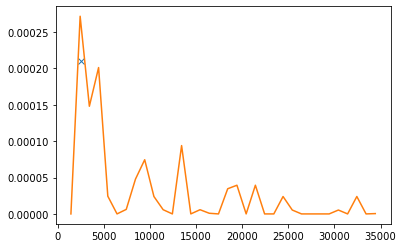

In [12]:
# Punto máximo de la estimación anterior 
f = limites
x = np.arange(1430,34600,1000)

max_limite = f(optimize.fmin(lambda x:-f(x),0,disp=False))

plt.plot(2500,0.00021,'x',lw = 10)

plt.plot(x,limites(x))

#### Simulación Montecarlo Crudo - Aceptación y Rechazo

In [13]:
np.random.seed(555)
N = 10000
var_aleatorias_montecarlo_limites = acep_rechazo(f,max_limite,N,34600,1)

In [14]:
print('La media de las variables aleatorias es de', var_aleatorias_montecarlo_limites.mean())
print('La media real de nuestros datos es de', data['Limite_credito'].mean())

La media de las variables aleatorias es de 17742.110714927043
La media real de nuestros datos es de 8631.953698034848


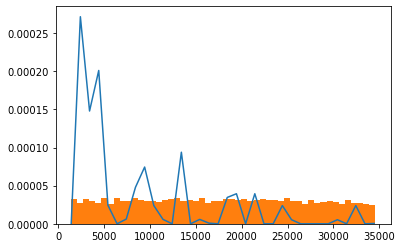

In [15]:
x = np.arange(1430,34600,1000)
plt.figure()
plt.plot(x,f(x))
plt.hist(var_aleatorias_montecarlo_limites, bins = 50, density = True)
plt.show()

In [16]:
# Histograma con los datos generados con la variable "sim_mont_alea"
# x = np.linspace(1430,34600,50)
# plt.figure()
# plt.plot(x,f)
# plt.hist(sim_mont_alea, bins = 20, density = True)
# plt.ylim(0, 0.00023)
# plt.show()

Al visualizar ambos histogramas,KDE y Simulación por Montecarlo, se puede apreciar que el segundo tiene un mejor ajuste en los datos. Sin embargo, el **Error Porcentual** con su respectivo **Nivel de Confianza** nos asegurará lo mencionado anteriormente.

#### Intervalo de Confianza y Error Porcentual

In [17]:
# Nivel de confianza
confianza = 0.95

X = var_aleatorias_montecarlo_limites
i1 = st.norm.interval(confianza, loc=np.mean(X), scale=st.sem(X))
media_limite = np.mean(X)
error = abs(np.array(data['Limite_credito'].mean() - media_limite)/media_limite)

print('Con una confianza de 95% la media por montecarlo crudo estará en el intervalo',(i1))
print('Media calculada por montecarlo crudo es de' ,media_limite)
print('El porcentaje de error entre la media real y la media estimada con montecarlo fue de', round(error*100,2),'%')

Con una confianza de 95% la media por montecarlo crudo estará en el intervalo (17557.305615243717, 17926.91581461037)
Media calculada por montecarlo crudo es de 17742.110714927043
El porcentaje de error entre la media real y la media estimada con montecarlo fue de 51.35 %


#### Distribuciones Hipotéticas 

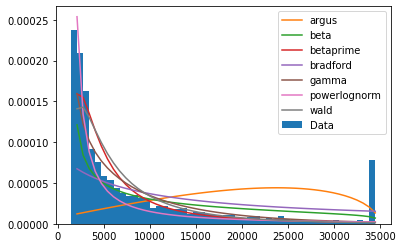

In [18]:
y, x ,_ = plt.hist(data['Limite_credito'], bins=50, density=True, label='Data')
x = x[1:]

dist = [d for d in dir(st) if isinstance(getattr(st,d), getattr(st, 'rv_continuous'))]
dist = dist[3:7] + ['gamma'] + ['powerlognorm'] + ['wald']
error = pd.DataFrame(index=dist, columns=['error'])

for d in dist:
    params= getattr(st,d).fit(data['Limite_credito'])
    y_hat = getattr(st, d)(*params).pdf(x)
    error.loc[d]= ((y-y_hat)**2).mean()
    plt.plot(x,y_hat, label=d)
    
plt.legend()
plt.show()

In [19]:
error.sort_values('error')

,error
betaprime,3.55985e-10
powerlognorm,4.33198e-10
gamma,4.88268e-10
wald,4.89587e-10
beta,9.62929e-10
bradford,1.48324e-09
argus,3.21389e-09


In [20]:
print('El error del kernel elegido es el de Betaprime con valor de',error.min())

El error del kernel elegido es el de Betaprime con valor de error    3.559850e-10
dtype: float64


La distribución que mejor se ajusta es la distribución betaprime, esta distribución es incluso mejor que la del kernel, por lo que decidimos hacer la prueba de chi cuadrada y cuantil cuantil para corroborar si en efecto la beta se ajustaba mejor.

> $H_0$: Los datos se distribuye como  una función de distribución betaprime

> $H_a$: Los datos no se distribuyen como betaprime

In [21]:
params = st.betaprime.fit(x)
params

(22.34058653465477, 4477.294738025832, -27040.793162824877, 9095071.306866262)

In [22]:
pi = st.betaprime.pdf(x,*params)
# Cálculo de la esperanza usando la expresión teórica
Ei = x*pi

# Cálculo teórico de la chi cuadrada
x2 = np.sum(list(map(lambda Ei, obs_i:(obs_i - Ei)**2 / Ei, Ei, y)))
print('Valor de chi cuadrado teorico  = ', x2)

# Cálculo usando la librería estadística de la chi cuadrada
X2 = st.chisquare(y, Ei)
print('Valor de chi cuadrado librería = ', X2)

# Cálculo de Grados de libertad del estadístico
p = 2 # Parámetros estimados con los datos
m = 20-p-1 # grados de libertad

Chi_est = st.chi2.ppf(q=0.95, df=m)
print('Estadístico de chi_cuadrado = ', Chi_est)

Valor de chi cuadrado teorico  =  24.51264548468972
Valor de chi cuadrado librería =  Power_divergenceResult(statistic=24.51264548468972, pvalue=0.9986658711673334)
Estadístico de chi_cuadrado =  27.58711163827534


Se acepta la  𝐻0  porque  𝑥2<𝑥21−𝛼,𝑚′ , por lo tanto no podemos rechazar que los datos se distribuyen como una función betaprime, además el  𝑝𝑣𝑎𝑙𝑢𝑒  es grande

#### Prueba de cuantil-cuantil

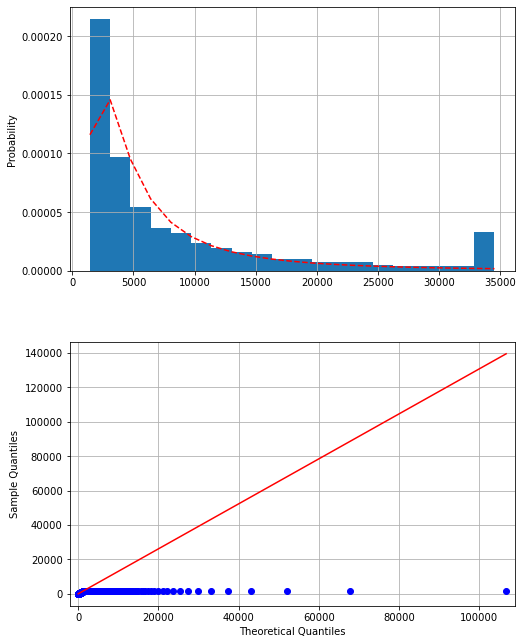

In [23]:
fig, ax = plt.subplots(2,1, figsize=(8,10))
fig.tight_layout(pad=5)

y, x, _ = ax[0].hist(data['Limite_credito'], bins=20, density=True, label='Histograma mediciones')
dist = 'betaprime'
params = getattr(st, dist).fit(data['Limite_credito'])
y_hat = getattr(st, dist).pdf(x, *params)
ax[0].plot(x, y_hat,'r--', label='Distribución ajustada')
ax[0].set_ylabel('Probability')
ax[0].grid()

grap1 = sm.qqplot(data['Limite_credito'], dist=getattr(st, dist), line='q', fit=True, ax=ax[1])
ax[1].grid()

#### Simulación de la distribución BETAPRIME

In [24]:
samp = st.betaprime.rvs(*params, size=1000) 
samp.mean(), len(samp)

(11513.08169745744, 1000)

In [25]:
print('La media de las variables aleatorias con distribución Betaprime es de', samp.mean() )
print('La media real de nuestros datos es de', data['Limite_credito'].mean() )

La media de las variables aleatorias con distribución Betaprime es de 11513.08169745744
La media real de nuestros datos es de 8631.953698034848


#### Intervalo de Confianza y Error Porcentual

In [26]:
np.random.seed(123)

# Nivel de confianza
confianza = 0.95
X = samp
i1 = st.norm.interval(confianza, loc=np.mean(X), scale=st.sem(X))
credito_medio = np.mean(X)


print('Con una confianza de %2.2f la media del límite de crédito promedio por montecarlo crudo, estará en el intervalo t normal,\n %s' %(confianza,i1))
print('Media calculada por montecarlo crudo del límite de crédito promedio' ,credito_medio)

error_positivos = abs(np.array(data['Limite_credito'].mean() - credito_medio)/credito_medio)
porcentaje = error_positivos*100
print('El porcentaje de error entre la media real y la media estimada con montecarlo fue de', round(porcentaje,2),'%')

Con una confianza de 0.95 la media del límite de crédito promedio por montecarlo crudo, estará en el intervalo t normal,
 (9078.06213451402, 13948.101260400861)
Media calculada por montecarlo crudo del límite de crédito promedio 11513.08169745744
El porcentaje de error entre la media real y la media estimada con montecarlo fue de 25.02 %


#### Simulación Montecarlo con Metodo de reducción de varianza para Betaprime

In [27]:
acumulada = st.betaprime.cdf(samp,*params)
len(acumulada)

1000

In [28]:
np.random.seed(123)
#Estratificado
N = 1000
u = muestreo_est(N)
funcion2 = lambda u: Gen_distr_discreta_(acumulada,samp,1000)
media2 = np.mean(funcion2(u))
media2

10711.642872309265

#### Intervalo de Confianza y Error Porcentual

In [29]:
np.random.seed(123)

# Nivel de confianza
confianza = 0.95
X = funcion2(u)
i1 = st.norm.interval(confianza, loc=np.mean(X), scale=st.sem(X))
credito_media = media2


print('Con una confianza de %2.2f la media del precio promedio por estratificado, estará en el intervalo t normal,\n %s' %(confianza,i1))
print('Media calculada por estratificado crudo del precio promedio' ,credito_media)

error_positivos = abs(np.array(data['Limite_credito'].mean() - credito_media)/credito_media)
porcentaje = error_positivos*100
print('El porcentaje de error entre la media real y la media estimada con estratificado fue de', round(porcentaje,2),'%')

Con una confianza de 0.95 la media del precio promedio por estratificado, estará en el intervalo t normal,
 (9028.677716277054, 12383.143115957771)
Media calculada por estratificado crudo del precio promedio 10711.642872309265
El porcentaje de error entre la media real y la media estimada con estratificado fue de 19.42 %


#### Resumen Funcion Gamma montecarlo VS Gamma estratificado

En este caso, nuevamente vemos que la simulación en Montecarlo crudo tuvo un error porcentual menor que el método estratificado por lo que este es con la distribución que nos quedaremos.

#### Conclusión Nodo 1

Al comparar la distribución Betaprime Cruda con el KDE así tenemos un error menor en la distribución Beta por lo que con esta hacemos una esimación sobre el límite de crédito promedio que se otorgará a los clientes será de: $12,423.85

### NODO 2. Edad cliente

Las tarjetas de crédito son una herramienta para cubrir los gastos que no pueden ser liquidados inmediatamente, por lo tanto la importancia de conocer en que rango de edad se encuentra la mayoría de los clientes en un banco, radica en que la institución tenga un panorama más amplio en cuanto a que sector de la población es más propenso a adquirir una. Lo anterior es una estrategia para crecer su cartera de clientes al ofrecer tarjetas de crédito a personas dentro del rango de edad más probable a aceptar una.

(array([2.650e+02, 6.540e+02, 1.478e+03, 1.778e+03, 2.422e+03, 1.920e+03,
        9.210e+02, 5.350e+02, 1.520e+02, 2.000e+00]),
 array([26. , 30.7, 35.4, 40.1, 44.8, 49.5, 54.2, 58.9, 63.6, 68.3, 73. ]),
 <a list of 10 Patch objects>)

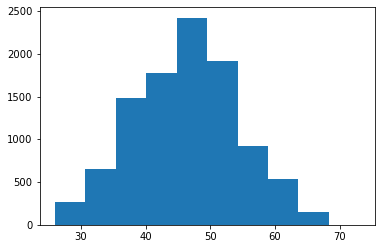

In [30]:
edad =  data['Edad']
plt.hist(edad)

Una vez visualizado el histograma sencillo de los datos, podemos observar que tiene una distribución gaussiana, por lo tanto optamos por utilizar un KDE gaussiano para estimar la función de densidad de probabilidad. Para esto necesitamos estimar antes el 'bando de ancha' mejor conocido como 'bandwidth'.

In [31]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(KernelDensity(),
                    {'bandwidth': np.linspace(1, 10, 30)},
                    cv=20) 
grid.fit(np.array(edad)[:, None])
print(grid.best_params_)

{'bandwidth': 1.3103448275862069}


Se obtiene como valor ideal un bandwidth de 1.3, y con esto aplicamos el KDE que arroja la distribución de probabilidad de la variable Edad del cliente.

In [32]:
# Debido al ajuste de parámetros, nos indica un bandwidth = 1.3
edades = kde_scipy_2(data['Edad'])
edades

<function __main__.kde_scipy_2.<locals>.<lambda>(x_grid)>

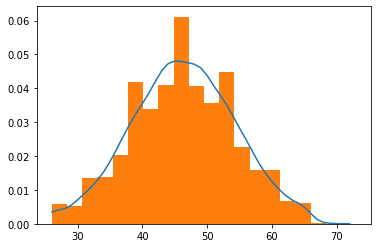

In [33]:
x_edad = np.arange(26,73,1)
plt.figure()
plt.plot(x_edad,edades(x_edad))
plt.hist(edad,bins =20, density = True)
plt.show()

Efectivamente, se tiene un buen ajuste del kernel utilizado para nuestros datos, sin embargo probaremos distintas distribuciones de probabilidad para verificar cual es la ideal con el menor error porcentual.

Para tener una mejor visualización de los datos, graficamos la distribución y el punto más alto.

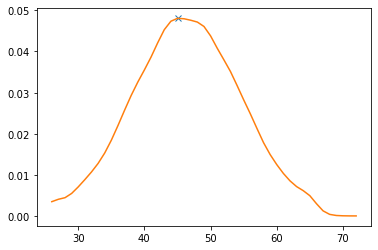

In [34]:
f = edades
x = np.arange(26,73,1)

max_edad = f(optimize.fmin(lambda x:-f(x),0,disp=False))

plt.plot(45,max_edad,'x',lw = 10)

plt.plot(x,edades(x))

#### Simulación Montecarlo CRUDO - Aceptación y Rechazo

In [35]:
np.random.seed(555)
N = 10000
var_aleatorias_montecarlo_edades = acep_rechazo(f,max_edad,N,73,1)

In [36]:
print('La media de las variables aleatorias es de', var_aleatorias_montecarlo_edades.mean())
print('La media real de nuestros datos es de', data['Edad'].mean())

La media de las variables aleatorias es de 46.37341864856671
La media real de nuestros datos es de 46.32596030413745


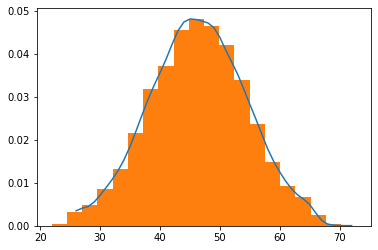

In [37]:
x = np.arange(26,73,1)
plt.figure()
plt.plot(x,f(x))
plt.hist(var_aleatorias_montecarlo_edades, bins = 20, density = True)
plt.show()

Como podemos observar en los resultados anteriores, los datos simulados con montecarlo comparados con la función de KDE tienen un gran parecido y comportamiento similar.

#### Intervalo de Confianza y Error Porcentual

In [38]:
np.random.seed(555)

# Nivel de confianza
confianza = 0.95

X = var_aleatorias_montecarlo_edades
i1 = st.norm.interval(confianza, loc=np.mean(X), scale=st.sem(X))
media_edades = np.mean(X)
error = abs(np.array(data['Edad'].mean() - media_edades)/media_edades)

print('Con una confianza de 95% la media por montecarlo crudo estará en el intervalo',(i1))
print('Media calculada por montecarlo crudo es de' ,media_edades)
print('El porcentaje de error entre la media real y la media estimada con montecarlo fue de', round(error*100,2),'%')

Con una confianza de 95% la media por montecarlo crudo estará en el intervalo (46.21423704659748, 46.53260025053594)
Media calculada por montecarlo crudo es de 46.37341864856671
El porcentaje de error entre la media real y la media estimada con montecarlo fue de 0.1 %


#### Probando ajuste de distribuciones hipotéticas

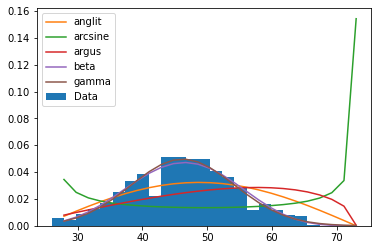

In [39]:
y, x ,_ = plt.hist(data['Edad'], bins=25, density=True, label='Data')
x = x[1:]

dist = [d for d in dir(st) if isinstance(getattr(st,d), getattr(st, 'rv_continuous'))]
dist = dist[1:5] + ['gamma']
error = pd.DataFrame(index=dist, columns=['error'])

for d in dist:
    params= getattr(st,d).fit(data['Edad'])
    y_hat = getattr(st, d)(*params).pdf(x)
    error.loc[d]= ((y-y_hat)**2).mean()
    plt.plot(x,y_hat, label=d)
    
plt.legend()
plt.show()

In [40]:
nodo2_error = error.T
er=nodo2_error.T
er

,error
anglit,0.000103883
arcsine,0.00142438
argus,0.000237332
beta,2.95996e-05
gamma,3.16917e-05


In [41]:
print('El error del kernel elegido es el de Gamma con valor minimo de',er.min())

El error del kernel elegido es el de Gamma con valor minimo de error    0.00003
dtype: float64


In [42]:
params = st.gamma.fit(x)
pi = st.gamma.pdf(x,*params)
# Cálculo de la esperanza usando la expresión teórica
Ei = x*pi

# Cálculo teórico de la chi cuadrada
#x2 = np.sum(list(map(lambda Ei, obs_i:(obs_i - Ei)**2 / Ei, Ei, y)))
#print('Valor de chi cuadrado teorico  = ', x2)

# Cálculo usando la librería estadística de la chi cuadrada
X2 = st.chisquare(y, Ei)
print('Valor de chi cuadrado librería = ', X2)

# Cálculo de Grados de libertad del estadístico
p = 2 # Parámetros estimados con los datos
m = 20-p-1 # grados de libertad

Chi_est = st.chi2.ppf(q=0.95, df=m)
print('Estadístico de chi_cuadrado = ', Chi_est)

Valor de chi cuadrado librería =  Power_divergenceResult(statistic=23.5639984204894, pvalue=0.48674205127599823)
Estadístico de chi_cuadrado =  27.58711163827534


Aceptamos la $H_0$ ya que el valor de chi cuadrado es menor al estadístico de chi cuadrado por lo tanto, no se puede rechazar que los datos se distribuyen como una función gamma

#### Prueba de cuantil-cuantil

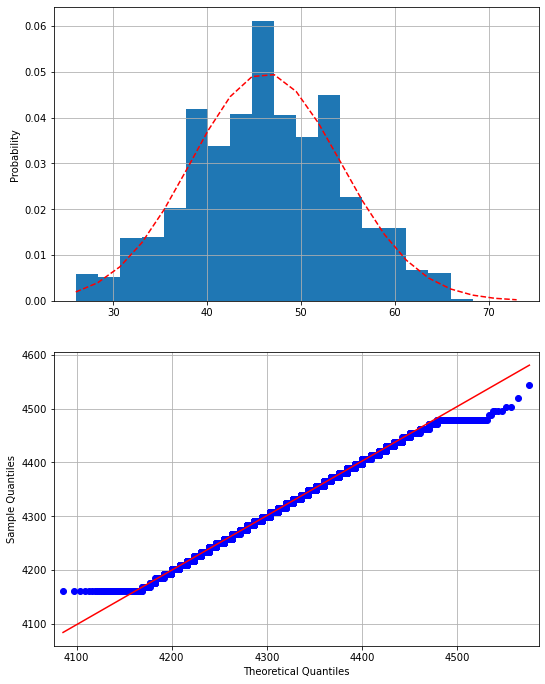

In [43]:
fig, ax = plt.subplots(2,1, figsize=(8,10))
fig.tight_layout(pad=3.0)

y, x, _ = ax[0].hist(data['Edad'], bins=20, density=True, label='Histograma mediciones')
dist = 'gamma'
params = getattr(st, dist).fit(data['Edad'])
y_hat = getattr(st, dist).pdf(x, *params)
ax[0].plot(x, y_hat,'r--', label='Distribución ajustada')
ax[0].set_ylabel('Probability')
ax[0].grid()

grap1 = sm.qqplot(data['Edad'], dist=getattr(st, dist), line='q', fit=True, ax=ax[1])
ax[1].grid()

Una vez más se comprueba que la distribución Gamma es la óptima al ajustarla a nuestros datos.

### Montecarlo Crudo

#### Simulación de la distribución Gamma

In [44]:
samp = st.gamma.rvs(*params, size=1000) 
samp.mean(), len(samp)

(46.35147234816977, 1000)

In [45]:
print('La media de las variables aleatorias con distribución GAMMA es de', samp.mean())
print('La media real de nuestros datos es de', data['Edad'].mean())

La media de las variables aleatorias con distribución GAMMA es de 46.35147234816977
La media real de nuestros datos es de 46.32596030413745


#### Intervalo de Confianza y Error Porcentual

In [46]:
np.random.seed(555)

# Nivel de confianza
confianza = 0.95
X = samp
i1 = st.norm.interval(confianza, loc=np.mean(X), scale=st.sem(X))
media_edades = np.mean(X)
error= abs(np.array(data['Edad'].mean() - media_edades)/media_edades)

print('Con una confianza de 95% la media la edad del cliente por montecarlo crudo, estará en el intervalo', i1)
print('Media calculada por montecarlo crudo de la edad media' ,media_edades)
print('El porcentaje de error entre la media real y la media estimada con montecarlo fue de', round(error*100,2),'%')

Con una confianza de 95% la media la edad del cliente por montecarlo crudo, estará en el intervalo (45.83934103214675, 46.863603664192794)
Media calculada por montecarlo crudo de la edad media 46.35147234816977
El porcentaje de error entre la media real y la media estimada con montecarlo fue de 0.06 %


### Montecarlo Estratificado

#### Simulación Montecarlo con Metodo de reducción de varianza para Gamma

In [47]:
acumulada = st.gamma.cdf(samp,*params)
len(acumulada)

1000

In [48]:
np.random.seed(555)
#Estratificado
N = 1000
u = muestreo_est(N)
funcion2 = lambda u: Gen_distr_discreta_(acumulada,samp,1000)
media2 = np.mean(funcion2(u))
media2

46.18628258793501

#### Intervalo de confianza y error porcentual

In [49]:
np.random.seed(123)

# Nivel de confianza
confianza = 0.95
X = funcion2(u)

i1 = st.norm.interval(confianza, loc=np.mean(X), scale=st.sem(X))

media_edades = media2
error= abs(np.array(data['Edad'].mean() - media_edades)/media_edades)


print('Con una confianza de 95% la media de la edad por estratificado, estará en el intervalo',i1)
print('Media calculada por estratificado crudo de la edad del cliente' ,media_edades)
print('El porcentaje de error entre la media real y la media estimada con estratificado fue de', round(error*100,2),'%')

Con una confianza de 95% la media de la edad por estratificado, estará en el intervalo (45.30697825807462, 46.323968121498694)
Media calculada por estratificado crudo de la edad del cliente 46.18628258793501
El porcentaje de error entre la media real y la media estimada con estratificado fue de 0.3 %


### Conclusiones Nodo 2.

Al comparar los errores porcentuales de Montecarlo crudo con distribución gamma y Montecarlo con reducción de varianza al utilizar distribución gamma, podemos concluir que efectivamente el primero presenta un menor valor, por lo que es el óptimo.

Observando las distribuciones de Gamma con metodo Montecarlo crudo y el KDE, se concluye que el menor error está en Gamma con metodo Montecarlo crudo.

En conclusión despues de simular por diferntes métodos la edad de los clientes se puede decir que se deberá ofrecer tarjetas de crédito a aquellos que se encuentren entre los 46 y 47 años de edad.

### Nodo 3. Número de transacciónes al año

Hicimos el histograma sencillo para tener una visualización más clara de como se distribuyen los datos

(array([ 187., 1074., 1658., 1246., 2267., 2289.,  757.,  331.,  275.,
          43.]),
 array([ 10. ,  22.9,  35.8,  48.7,  61.6,  74.5,  87.4, 100.3, 113.2,
        126.1, 139. ]),
 <a list of 10 Patch objects>)

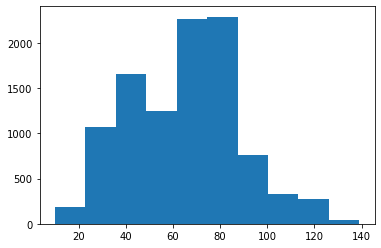

In [50]:
transaccion =  data['Total_Trans_Ct']
plt.hist(transaccion)

In [51]:
# from sklearn.model_selection import GridSearchCV
# grid = GridSearchCV(KernelDensity(),
#                     {'bandwidth': np.linspace(1, 10, 30)},
#                     cv=20) 
# grid.fit(np.array(transaccion)[:, None])
# print(grid.best_params_)

Utilizamos la libreria de sklearn.model_selection para encontrar el bandwidth ideal para nuestros datos, en base a esto continuamos con el bandwidth arrojado

In [52]:
# Debido al ajuste de parámetros, nos indica un bandwidth = 1.3
trans = kde_scipy_3(data['Total_Trans_Ct'])
trans

<function __main__.kde_scipy_3.<locals>.<lambda>(x_grid)>

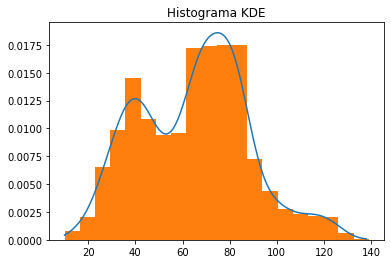

In [53]:
x_trans = np.arange(10,139,1)
plt.figure()
plt.plot(x_trans,trans(x_trans))
plt.hist(transaccion,bins =20, density = True)
plt.title('Histograma KDE')
plt.show()

Visualizamos el punto máximo en comparación con el ajuste

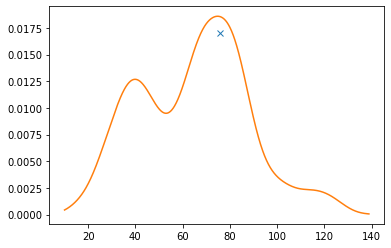

In [54]:
f = trans
x = np.arange(10,139,0.1)

max_trans = f(optimize.fmin(lambda x:-f(x),0,disp=False))

plt.plot(76,0.0170,'x',lw = 10)

plt.plot(x,trans(x))

#### Simulación Montecarlo CRUDO - Aceptación y Rechazo

In [55]:
np.random.seed(555)
N = 10000
var_aleatorias_montecarlo_trans = acep_rechazo(f,max_trans,N,138,1)

In [56]:
print('La media de las variables aleatorias es de', var_aleatorias_montecarlo_trans.mean())
print('La media real de nuestros datos es de', data['Total_Trans_Ct'].mean())

La media de las variables aleatorias es de 63.90499887675486
La media real de nuestros datos es de 64.85869457884863


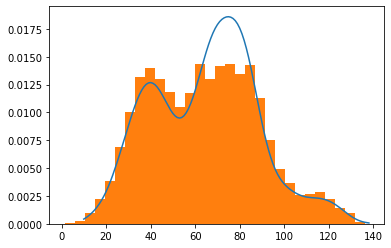

In [57]:
x = np.arange(10,139,1)
plt.figure()
plt.plot(x,f(x))
plt.hist(var_aleatorias_montecarlo_trans, bins = 30, density = True)
plt.show()

#### Intervalo de Confianza y Error Porcentual

In [58]:
np.random.seed(555)

# Nivel de confianza
confianza = 0.95

X = var_aleatorias_montecarlo_trans
i1 = st.norm.interval(confianza, loc=np.mean(X), scale=st.sem(X))
media_trans = np.mean(X)
error = abs(np.array(data['Total_Trans_Ct'].mean() - media_trans)/media_trans)

print('Con una confianza de 95% la media por montecarlo crudo estará en el intervalo',(i1))
print('Media calculada por montecarlo crudo es de' ,media_trans)
print('El porcentaje de error entre la media real y la media estimada con montecarlo fue de', round(error*100,2),'%')

Con una confianza de 95% la media por montecarlo crudo estará en el intervalo (63.416360695306935, 64.39363705820278)
Media calculada por montecarlo crudo es de 63.90499887675486
El porcentaje de error entre la media real y la media estimada con montecarlo fue de 1.49 %


#### Probando ajuste de distribuciones hipotéticas

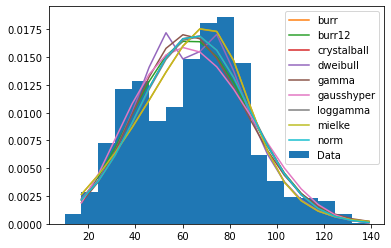

In [59]:
y, x ,_ = plt.hist(transaccion, bins=18, density=True, label='Data')
x = x[1:]

dist = [d for d in dir(st) if isinstance(getattr(st,d), getattr(st, 'rv_continuous'))]
dist = ['burr', 'burr12','crystalball', 'dweibull', 'gamma','gausshyper', 'loggamma', 'mielke', 'norm']
error = pd.DataFrame(index=dist, columns=['error'])

for d in dist:
    params= getattr(st,d).fit(transaccion)
    y_hat = getattr(st, d)(*params).pdf(x)
    error.loc[d]= ((y-y_hat)**2).mean()
    plt.plot(x,y_hat, label=d)
    
plt.legend()
plt.show()

In [60]:
error=error.sort_values('error')
error.T

,burr,mielke,loggamma,dweibull,norm,crystalball,burr12,gausshyper,gamma
error,6.28964e-06,6.30599e-06,7.9207e-06,7.9277e-06,8.16964e-06,8.16964e-06,8.3195e-06,8.63956e-06,9.73252e-06


In [61]:
print('El error del kernel elegido es el de burr con valor minimo de',error.min())

El error del kernel elegido es el de burr con valor minimo de error    0.000006
dtype: float64


In [62]:
params = st.burr.fit(x)
pi = st.burr.pdf(x,*params)
# Cálculo de la esperanza usando la expresión teórica
Ei = x*pi

# Cálculo teórico de la chi cuadrada
#x2 = np.sum(list(map(lambda Ei, obs_i:(obs_i - Ei)**2 / Ei, Ei, y)))
#print('Valor de chi cuadrado teorico  = ', x2)

# Cálculo usando la librería estadística de la chi cuadrada
X2 = st.chisquare(y, Ei)
print('Valor de chi cuadrado librería = ', X2)

# Cálculo de Grados de libertad del estadístico
p = 2 # Parámetros estimados con los datos
m = 20-p-1 # grados de libertad

Chi_est = st.chi2.ppf(q=0.95, df=m)
print('Estadístico de chi_cuadrado = ', Chi_est)

Valor de chi cuadrado librería =  Power_divergenceResult(statistic=11.062332992435971, pvalue=0.8533053184069637)
Estadístico de chi_cuadrado =  27.58711163827534


Aceptamos la $H_0$ ya que el valor de chi cuadrado es menor al estadístico de chi cuadrado por lo tanto, no se puede rechazar que los datos se distribuyen como una función burr

#### Prueba de cuantil-cuantil

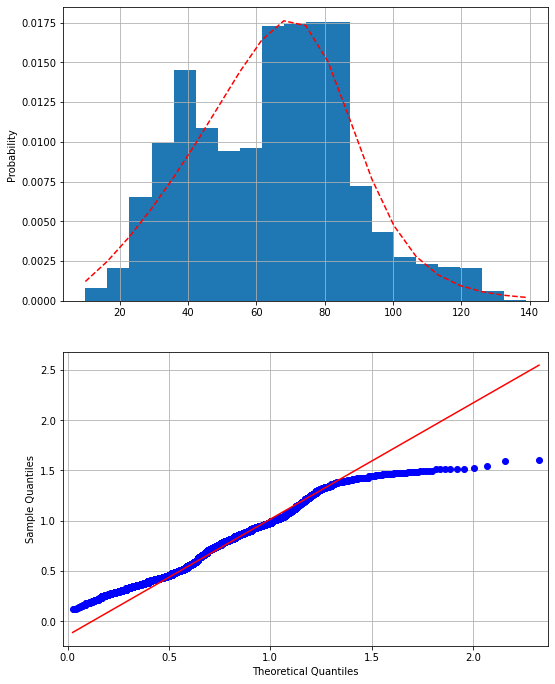

In [63]:
fig, ax = plt.subplots(2,1, figsize=(8,10))
fig.tight_layout(pad=3.0)

y, x, _ = ax[0].hist(data['Total_Trans_Ct'], bins=20, density=True, label='Histograma mediciones')
dist = 'burr'
params = getattr(st, dist).fit(data['Total_Trans_Ct'])
y_hat = getattr(st, dist).pdf(x, *params)
ax[0].plot(x, y_hat,'r--', label='Distribución ajustada')
ax[0].set_ylabel('Probability')
ax[0].grid()

grap1 = sm.qqplot(data['Total_Trans_Ct'], dist=getattr(st, dist), line='q', fit=True, ax=ax[1])
ax[1].grid()

### Montecarlo Crudo

#### Simulación de la distribución Beta

In [64]:
samp = st.burr.rvs(*params, size=1000) 
samp.mean(), len(samp)

(64.31769547861262, 1000)

In [65]:
print('La media de las variables aleatorias con distribución BURR es de', samp.mean())
print('La media real de nuestros datos es de', data['Total_Trans_Ct'].mean())

La media de las variables aleatorias con distribución BURR es de 64.31769547861262
La media real de nuestros datos es de 64.85869457884863


#### Intervalo de Confianza y Error Porcentual

In [66]:
np.random.seed(555)

# Nivel de confianza
confianza = 0.95
X = samp
i1 = st.norm.interval(confianza, loc=np.mean(X), scale=st.sem(X))
media_trans = np.mean(X)
error= abs(np.array(data['Total_Trans_Ct'].mean() - media_trans)/media_trans)

print('Con una confianza de 95% la media la edad del cliente por montecarlo crudo, estará en el intervalo', i1)
print('Media calculada por montecarlo crudo de la edad media' ,media_trans)
print('El porcentaje de error entre la media real y la media estimada con montecarlo fue de', round(error*100,2),'%')

Con una confianza de 95% la media la edad del cliente por montecarlo crudo, estará en el intervalo (62.83197373000988, 65.80341722721536)
Media calculada por montecarlo crudo de la edad media 64.31769547861262
El porcentaje de error entre la media real y la media estimada con montecarlo fue de 0.84 %


### Montecarlo Estratificado

#### Simulación Montecarlo con Metodo de reducción de varianza para Beta

In [67]:
acumulada = st.burr.cdf(samp,*params)
len(acumulada)

1000

In [68]:
np.random.seed(555)
#Estratificado
N = 1000
u = muestreo_est(N)
funcion3 = lambda u: Gen_distr_discreta_(acumulada,samp,1000)
media3 = np.mean(funcion3(u))
media3

63.883704848363756

#### Intervalo de confianza y error porcentual

In [69]:
np.random.seed(123)

# Nivel de confianza
confianza = 0.95
X = funcion3(u)

i1 = st.norm.interval(confianza, loc=np.mean(X), scale=st.sem(X))

media_trans = media3
error= abs(np.array(data['Total_Trans_Ct'].mean() - media_trans)/media_trans)


print('Con una confianza de 95% la media de la edad por estratificado, estará en el intervalo',i1)
print('Media calculada por estratificado crudo de la edad del cliente' ,media_trans)
print('El porcentaje de error entre la media real y la media estimada con estratificado fue de', round(error*100,2),'%')

Con una confianza de 95% la media de la edad por estratificado, estará en el intervalo (63.73656997099103, 66.73291641827545)
Media calculada por estratificado crudo de la edad del cliente 63.883704848363756
El porcentaje de error entre la media real y la media estimada con estratificado fue de 1.53 %


### Conclusiones Nodo 3. 

### NODO 4. Tiempo activo

explicación

(array([ 188.,  278.,  546., 1208., 1265., 3485., 1515.,  825.,  479.,
         338.]),
 array([13. , 17.3, 21.6, 25.9, 30.2, 34.5, 38.8, 43.1, 47.4, 51.7, 56. ]),
 <a list of 10 Patch objects>)

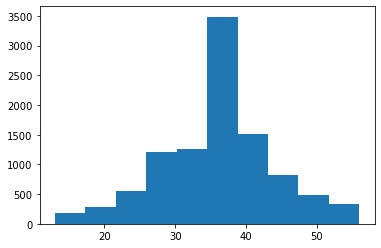

In [70]:
mes = data['Meses_cuenta']
plt.hist(mes)

In [71]:
# from sklearn.model_selection import GridSearchCV
# grid = GridSearchCV(KernelDensity(),
#                     {'bandwidth': np.linspace(1, 10, 30)},
#                     cv=20) 
# grid.fit(np.array(meses)[:, None])
# print(grid.best_params_)

In [72]:
# Debido al ajuste de parámetros, nos indica un bandwidth = 1.3
meses = kde_scipy_1(data['Meses_cuenta'])
meses

<function __main__.kde_scipy_1.<locals>.<lambda>(x_grid)>

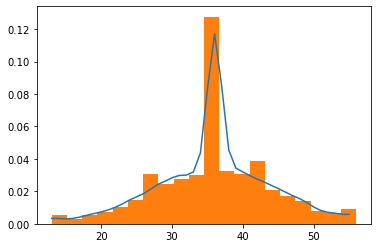

In [73]:
x_meses = np.arange(13,56,1)
plt.figure()
plt.plot(x_meses,meses(x_meses))
plt.hist(mes,bins =20, density = True)
plt.show()

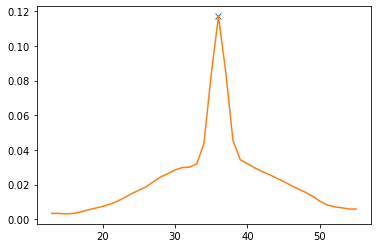

In [74]:
f = meses
x = np.arange(13,56,1)

max_meses = f(optimize.fmin(lambda x:-f(x),0,disp=False))

plt.plot(36,max_meses,'x',lw = 10)

plt.plot(x,meses(x))

#### Simulación Montecarlo CRUDO - Aceptación y Rechazo

In [75]:
np.random.seed(555)
N = 10000
var_aleatorias_montecarlo_meses = acep_rechazo(f,max_meses,N,75,1)

In [76]:
print('La media de las variables aleatorias es de', var_aleatorias_montecarlo_meses.mean())
print('La media real de nuestros datos es de', data['Meses_cuenta'].mean())

La media de las variables aleatorias es de 35.91794486963344
La media real de nuestros datos es de 35.928409203120374


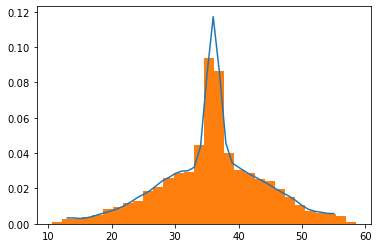

In [77]:
x = np.arange(13,56,1)
plt.figure()
plt.plot(x,f(x))
plt.hist(var_aleatorias_montecarlo_meses, bins = 30, density = True)
plt.show()

#### Intervalo de Confianza y Error Porcentual

In [78]:
np.random.seed(555)

# Nivel de confianza
confianza = 0.95

X = var_aleatorias_montecarlo_meses
i1 = st.norm.interval(confianza, loc=np.mean(X), scale=st.sem(X))
media_meses = np.mean(X)
error = abs(np.array(data['Meses_cuenta'].mean() - media_meses)/media_meses)

print('Con una confianza de 95% la media por montecarlo crudo estará en el intervalo',(i1))
print('Media calculada por montecarlo crudo es de' ,media_meses)
print('El porcentaje de error entre la media real y la media estimada con montecarlo fue de', round(error*100,2),'%')

Con una confianza de 95% la media por montecarlo crudo estará en el intervalo (35.76042298795652, 36.07546675131036)
Media calculada por montecarlo crudo es de 35.91794486963344
El porcentaje de error entre la media real y la media estimada con montecarlo fue de 0.03 %


#### Probando ajuste de distribuciones hipotéticas

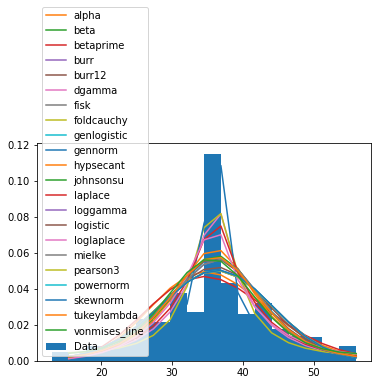

In [79]:
y, x ,_ = plt.hist(mes, bins=18, density=True, label='Data')
x = x[1:]

dist = [d for d in dir(st) if isinstance(getattr(st,d), getattr(st, 'rv_continuous'))]
dist = ['alpha','beta', 'betaprime', 'burr', 'burr12', 'dgamma', 'fisk', 'foldcauchy', 'genlogistic', 'gennorm', 'hypsecant',
 'johnsonsu', 'laplace', 'loggamma','logistic', 'loglaplace', 'mielke', 'pearson3', 'powernorm', 'skewnorm', 'tukeylambda',
 'vonmises_line']
error = pd.DataFrame(index=dist, columns=['error'])

for d in dist:
    params= getattr(st,d).fit(mes)
    y_hat = getattr(st, d)(*params).pdf(x)
    error.loc[d]= ((y-y_hat)**2).mean()
    plt.plot(x,y_hat, label=d)
    
plt.legend()
plt.show()

In [80]:
error=error.sort_values('error')
error.T

,dgamma,gennorm,laplace,foldcauchy,loglaplace,hypsecant,johnsonsu,genlogistic,mielke,burr,...,logistic,vonmises_line,burr12,skewnorm,powernorm,loggamma,pearson3,beta,alpha,betaprime
error,0.000185846,0.000190347,0.000202986,0.000216053,0.000227123,0.000252431,0.000262328,0.000265401,0.000266269,0.000266269,...,0.000270273,0.000281992,0.000288865,0.000294291,0.000294489,0.000296471,0.000296846,0.000297124,0.000323971,0.000335771


In [81]:
print('El error del kernel elegido es el de dgamma con valor minimo de',error.min())

El error del kernel elegido es el de dgamma con valor minimo de error    0.000186
dtype: float64


In [82]:
params = st.dgamma.fit(x)
pi = st.dgamma.pdf(x,*params)
# Cálculo de la esperanza usando la expresión teórica
Ei = x*pi

# Cálculo teórico de la chi cuadrada
#x2 = np.sum(list(map(lambda Ei, obs_i:(obs_i - Ei)**2 / Ei, Ei, y)))
#print('Valor de chi cuadrado teorico  = ', x2)

# Cálculo usando la librería estadística de la chi cuadrada
X2 = st.chisquare(y, Ei)
print('Valor de chi cuadrado librería = ', X2)

# Cálculo de Grados de libertad del estadístico
p = 2 # Parámetros estimados con los datos
m = 20-p-1 # grados de libertad

Chi_est = st.chi2.ppf(q=0.95, df=m)
print('Estadístico de chi_cuadrado = ', Chi_est)

Valor de chi cuadrado librería =  Power_divergenceResult(statistic=12.89796447230151, pvalue=0.7429894452205448)
Estadístico de chi_cuadrado =  27.58711163827534


#### Prueba de cuantil-cuantil

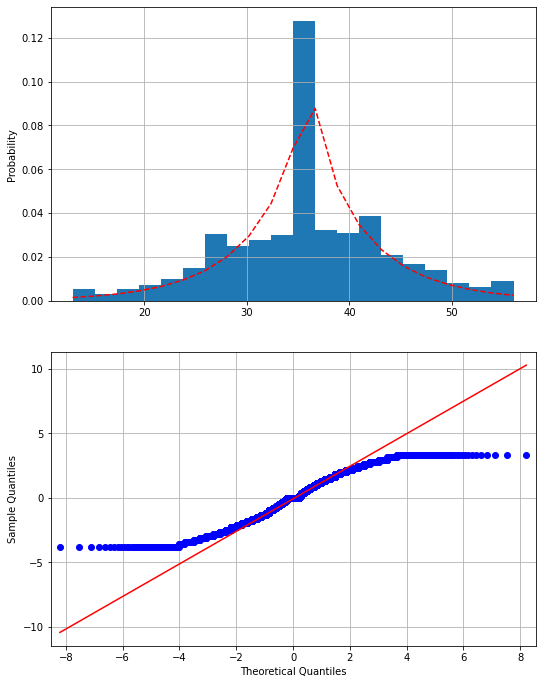

In [83]:
fig, ax = plt.subplots(2,1, figsize=(8,10))
fig.tight_layout(pad=3.0)

y, x, _ = ax[0].hist(data['Meses_cuenta'], bins=20, density=True, label='Histograma mediciones')
dist = 'dgamma'
params = getattr(st, dist).fit(data['Meses_cuenta'])
y_hat = getattr(st, dist).pdf(x, *params)
ax[0].plot(x, y_hat,'r--', label='Distribución ajustada')
ax[0].set_ylabel('Probability')
ax[0].grid()

grap1 = sm.qqplot(data['Meses_cuenta'], dist=getattr(st, dist), line='q', fit=True, ax=ax[1])
ax[1].grid()

### Montecarlo Crudo

#### Simulación de la distribución Beta

In [84]:
samp = st.dgamma.rvs(*params, size=1000) 
samp.mean(), len(samp)

(35.898266841313266, 1000)

In [85]:
print('La media de las variables aleatorias con distribución DGAMMA es de', samp.mean())
print('La media real de nuestros datos es de', data['Meses_cuenta'].mean())

La media de las variables aleatorias con distribución DGAMMA es de 35.898266841313266
La media real de nuestros datos es de 35.928409203120374


#### Intervalo de Confianza y Error Porcentual

In [86]:
np.random.seed(555)

# Nivel de confianza
confianza = 0.95
X = samp
i1 = st.norm.interval(confianza, loc=np.mean(X), scale=st.sem(X))
media_meses = np.mean(X)
error= abs(np.array(data['Meses_cuenta'].mean() - media_meses)/media_meses)

print('Con una confianza de 95% la media la edad del cliente por montecarlo crudo, estará en el intervalo', i1)
print('Media calculada por montecarlo crudo de la edad media' ,media_meses)
print('El porcentaje de error entre la media real y la media estimada con montecarlo fue de', round(error*100,2),'%')

Con una confianza de 95% la media la edad del cliente por montecarlo crudo, estará en el intervalo (35.385152337817615, 36.411381344808916)
Media calculada por montecarlo crudo de la edad media 35.898266841313266
El porcentaje de error entre la media real y la media estimada con montecarlo fue de 0.08 %


### Montecarlo Estratificado

#### Simulación Montecarlo con Metodo de reducción de varianza para Beta

In [87]:
acumulada = st.dgamma.cdf(samp,*params)
len(acumulada)

1000

In [88]:
np.random.seed(555)
#Estratificado
N = 1000
u = muestreo_est(N)
funcion4 = lambda u: Gen_distr_discreta_(acumulada,samp,1000)
media4 = np.mean(funcion4(u))
media4

35.714778510969076

#### Intervalo de confianza y error porcentual

In [89]:
np.random.seed(123)

# Nivel de confianza
confianza = 0.95
X = funcion4(u)

i1 = st.norm.interval(confianza, loc=np.mean(X), scale=st.sem(X))

media_meses = media4
error= abs(np.array(data['Meses_cuenta'].mean() - media_meses)/media_meses)


print('Con una confianza de 95% la media de la edad por estratificado, estará en el intervalo',i1)
print('Media calculada por estratificado crudo de la edad del cliente' ,media_meses)
print('El porcentaje de error entre la media real y la media estimada con estratificado fue de', round(error*100,2),'%')

Con una confianza de 95% la media de la edad por estratificado, estará en el intervalo (35.73693202954386, 36.71183381024613)
Media calculada por estratificado crudo de la edad del cliente 35.714778510969076
El porcentaje de error entre la media real y la media estimada con estratificado fue de 0.6 %


### Conclusiones Nodo 4